## Import the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# To display image
from PIL import Image

# To read dataset images
import cv2
import os

In [2]:
# Getting the class names
import pathlib
import numpy as np
train_dir = pathlib.Path("data/train") # Turns our training path into a Python path
class_names = np.array(sorted([item.name for item in train_dir.glob('*')])) # Creates a list of class_names from the subdirectories
print(class_names)

['covid' 'normal']


In [3]:
# Function to view an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (1171, 1462)


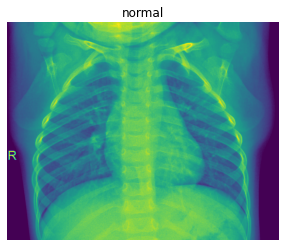

In [4]:
# View a random image from the training dataset
img = view_random_image(target_dir="data/train/",
                        target_class="normal")

## Preprocess the Data

In [5]:
# Define training,test and validation directory paths
train_dir = "data/train/"
test_dir = "data/test/"

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from numpy import expand_dims

In [7]:
# Normalizing the pixel values
train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator (rescale=1./255)

In [8]:
train_set = train_datagen.flow_from_directory(train_dir, target_size=(224,224), batch_size= 32, class_mode='binary')
test_set = test_datagen.flow_from_directory(test_dir, target_size=(224,224), batch_size= 32, class_mode='binary')

Found 130 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [9]:
train_set.image_shape, test_set.image_shape

((224, 224, 3), (224, 224, 3))

## Build the Model

In [10]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=10, kernel_size=(3,3), activation="relu", input_shape=(224,224,3)),
        tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history = model.fit(train_set,
                    epochs=5,
                    steps_per_epoch=len(train_set),
                    validation_data=test_set,
                    validation_steps=len(test_set))

Epoch 1/5
5/5 [==============================] - 6s 1s/step - loss: 1.4904 - accuracy: 0.4769 - val_loss: 0.4223 - val_accuracy: 0.8889
Epoch 2/5
5/5 [==============================] - 4s 782ms/step - loss: 0.5781 - accuracy: 0.6769 - val_loss: 0.3926 - val_accuracy: 0.7222
Epoch 3/5
5/5 [==============================] - 4s 790ms/step - loss: 0.3516 - accuracy: 0.8462 - val_loss: 0.1789 - val_accuracy: 0.9444
Epoch 4/5
5/5 [==============================] - 4s 859ms/step - loss: 0.1945 - accuracy: 0.9231 - val_loss: 0.1021 - val_accuracy: 1.0000
Epoch 5/5
5/5 [==============================] - 4s 750ms/step - loss: 0.1543 - accuracy: 0.9538 - val_loss: 0.0639 - val_accuracy: 1.0000


Text(0.5, 1.0, 'Model loss curve')

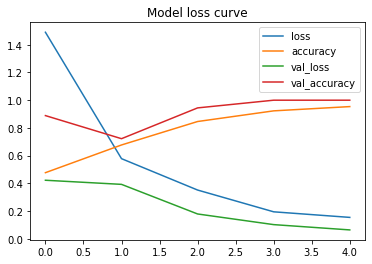

In [11]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model loss curve")

In [12]:
# Evaluate the model
model.evaluate(test_set)

1/1 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 1.0000


[0.06389018893241882, 1.0]